In [12]:
import utils
import os

from PIL import Image
from stylizer import Stylizer
from torchvision import transforms

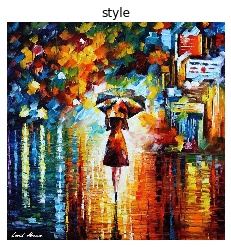

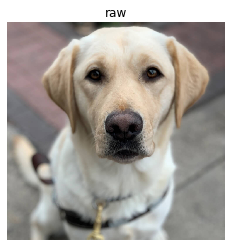

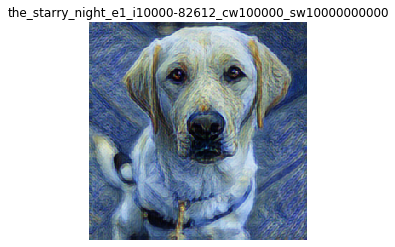

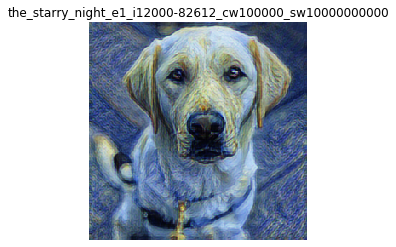

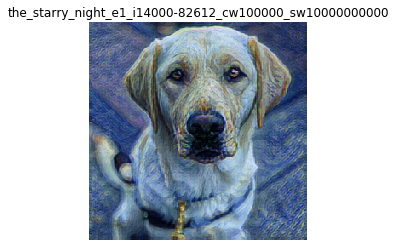

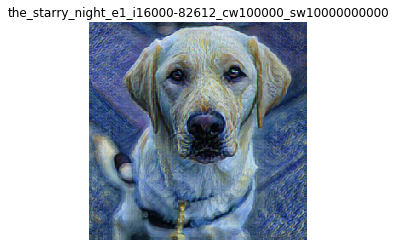

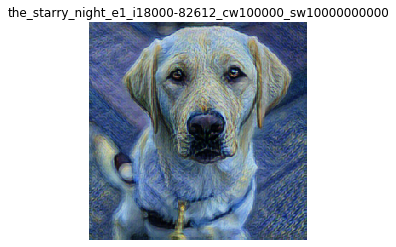

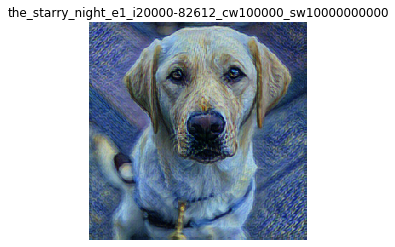

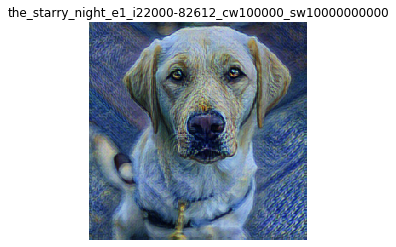

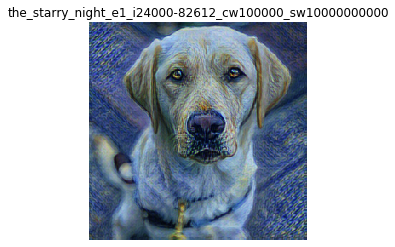

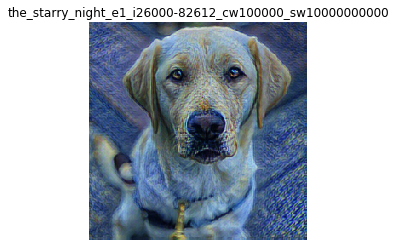

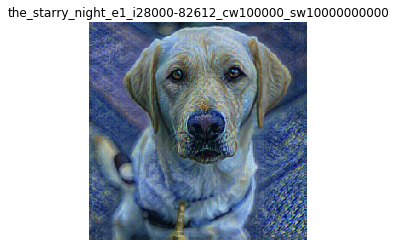

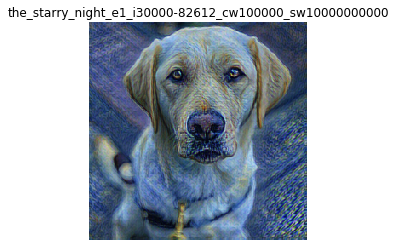

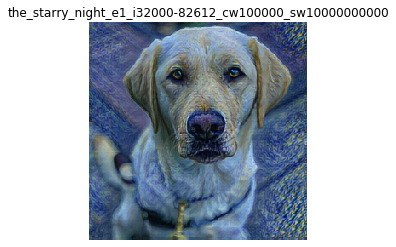

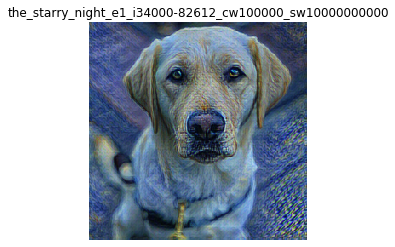

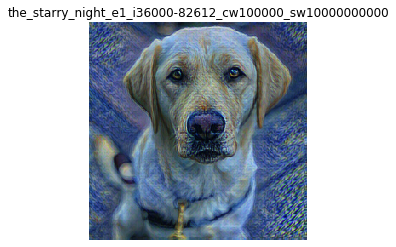

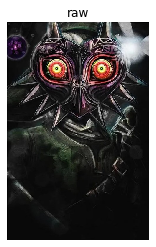

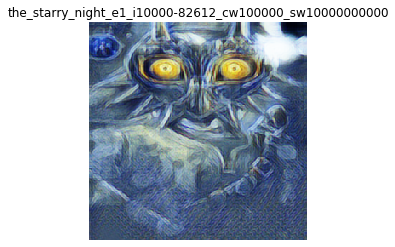

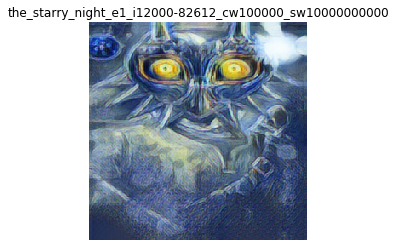

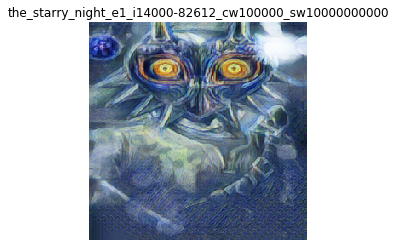

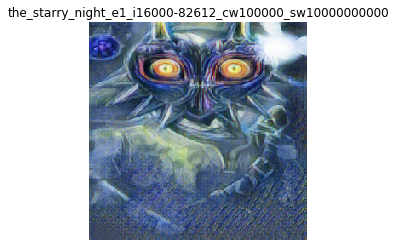

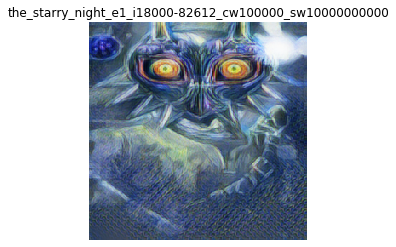

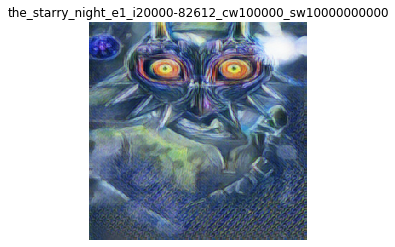

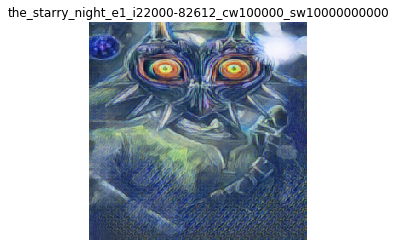

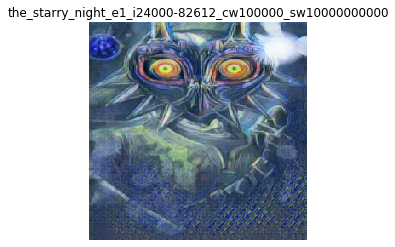

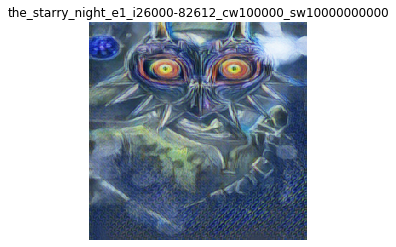

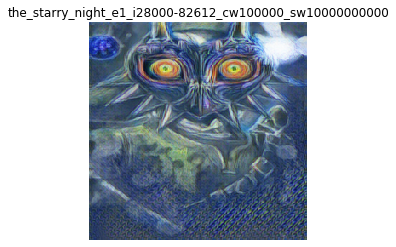

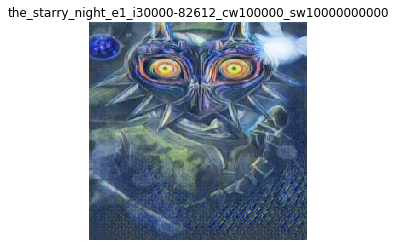

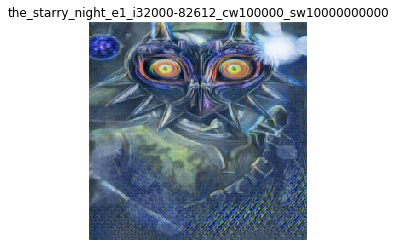

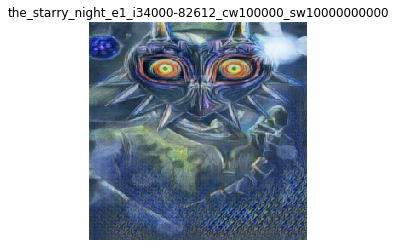

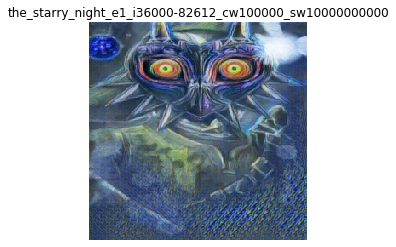

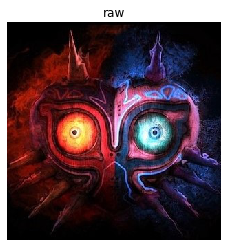

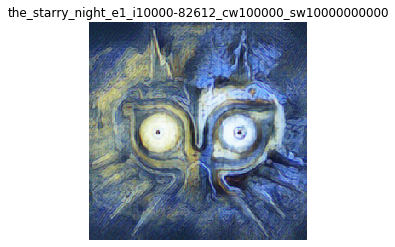

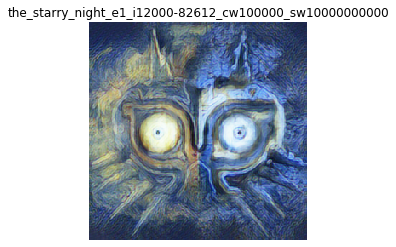

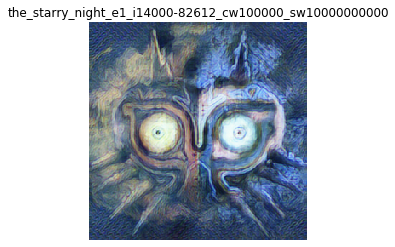

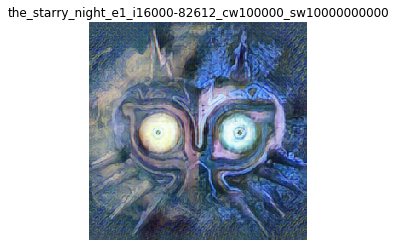

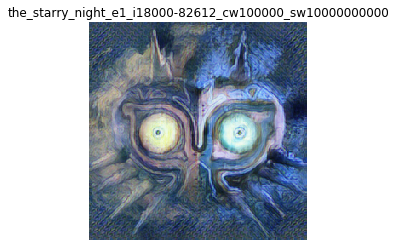

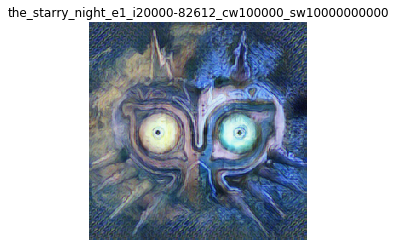

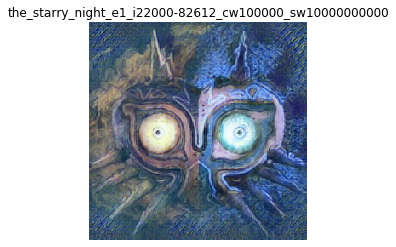

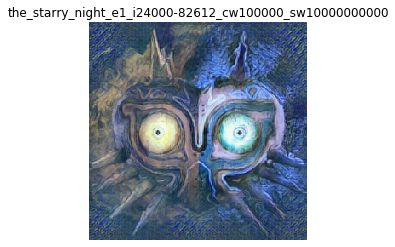

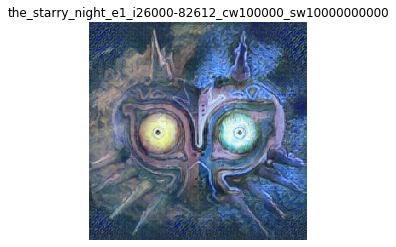

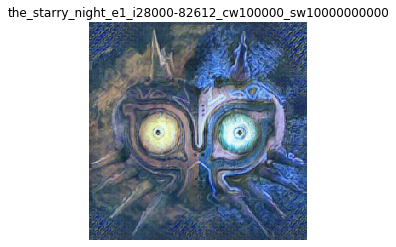

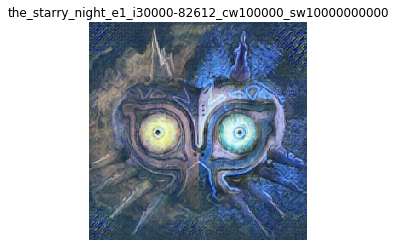

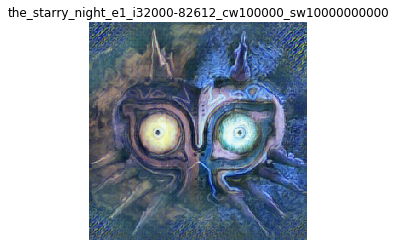

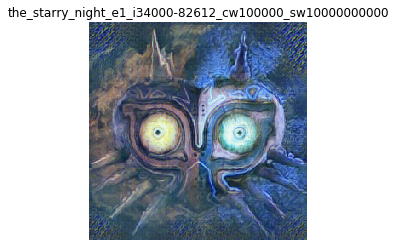

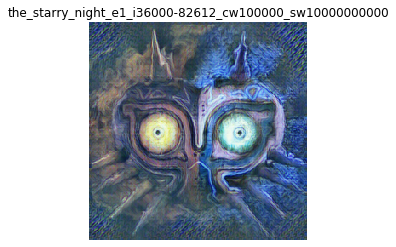

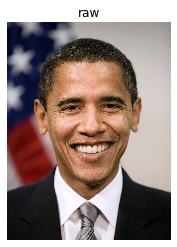

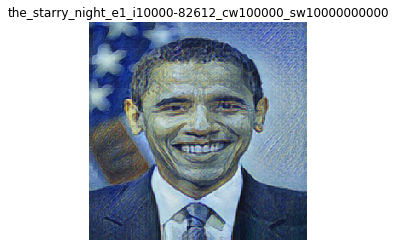

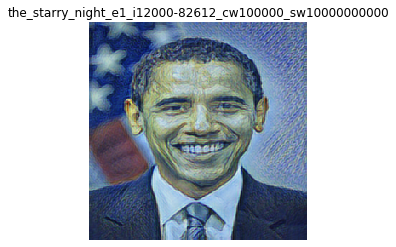

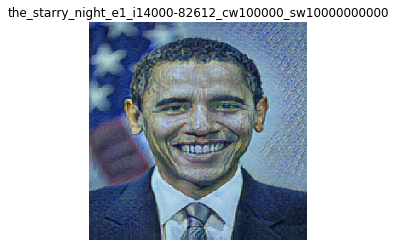

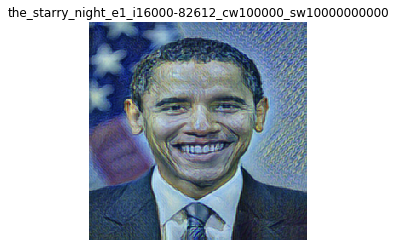

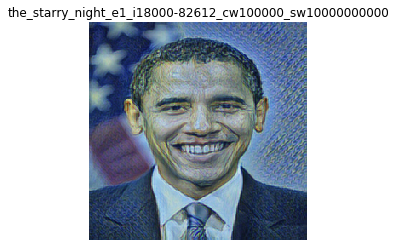

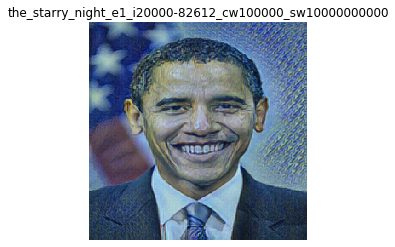

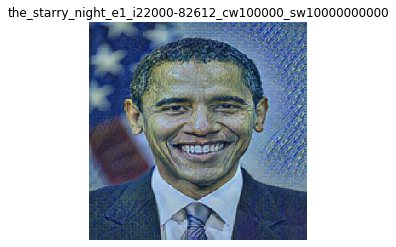

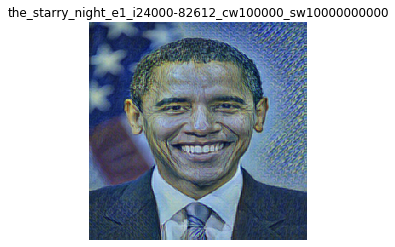

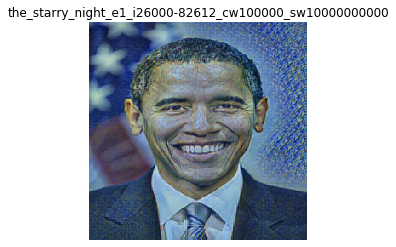

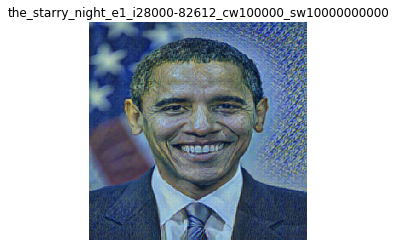

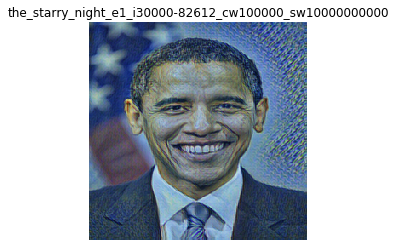

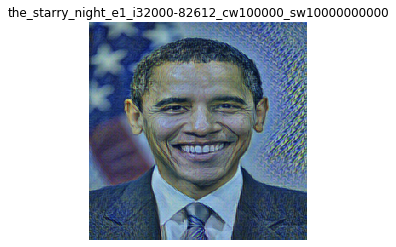

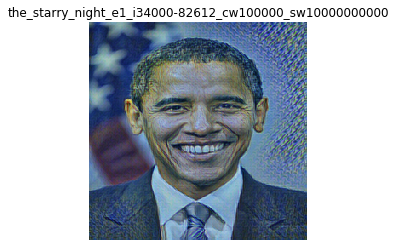

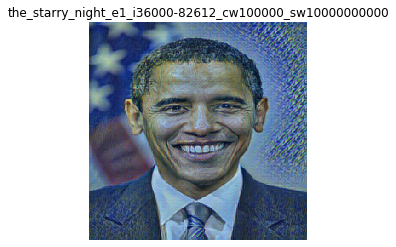

In [64]:
trained_models_dir = '../outputs/trained_transfer_models/'
content_images_dir = '../data/test_data/'
#trained_models_filenames = os.listdir(trained_models_dir)
trained_models_filenames = ['the_starry_night_e1_i{}-82612_cw100000_sw10000000000.pth'.format(i) 
                            for i in range(10000, 38000, 2000)]
#trained_models_filenames.extend(['the_starry_night_e1_i{}-82612_cw100000_sw30000000000.pth'.format(i) 
#                            for i in range(24000, 34000, 2000)])
#trained_models_filenames = ['rain_princess_e1_i{}-82612_cw100000_sw20000000000.pth'.format(i) 
#                                 for i in range(30000, 38000, 2000)]

style_image_path = '../data/styles/rain_princess.jpg'
utils.display_image(transforms.ToTensor()(Image.open(style_image_path)), 'style')

content_images_filenames = os.listdir(content_images_dir)

for content_image_path in content_images_filenames:
    content_image_path = '../data/contents/' + content_image_path
    utils.display_image(transforms.ToTensor()(Image.open(content_image_path)), 'raw')
    for trained_model_name in trained_models_filenames:
        stylizer = Stylizer(trained_models_dir + trained_model_name)
        stylized_image = stylizer.stylize(content_image_path, resize=(256, 256), save=False)
        utils.display_image(stylized_image, trained_model_name.split('.')[0])